In [1]:
import networkx as nx

import numpy as np
import scipy.sparse as sp

from typing import Optional

import matplotlib.pyplot as plt

from tqdm import tqdm

In [2]:
class PageRankSolution():
    def __init__(
            self, 
            dataset_file: Optional[str] = None
    ) -> None:
        self.dataset_file = dataset_file
        self.tm = None
        self.num_nodes = None

    @staticmethod
    def calculate_density_stats(
        transition_matrix
    ) -> None:


        non_zero_count = transition_matrix.nnz

        row_indices, col_indices = transition_matrix.nonzero()

        row_degrees = np.bincount(row_indices, minlength=transition_matrix.shape[0])

        col_degrees = np.bincount(col_indices, minlength=transition_matrix.shape[1])

        min_row_degree = row_degrees.min()
        max_row_degree = row_degrees.max()
        avg_row_degree = row_degrees.mean()

        min_col_degree = col_degrees.min()
        max_col_degree = col_degrees.max()
        avg_col_degree = col_degrees.mean()

        print("General non-zero element statistics:")
        print(f"  Total number of non-zero elements: {non_zero_count}")

        print("Row degree statistics:")
        print(f"  Minimum row degree: {min_row_degree}")
        print(f"  Maximum row degree: {max_row_degree}")
        print(f"  Average row degree: {avg_row_degree:.4f}")

        print("Column degree statistics:")
        print(f"  Minimum column degree: {min_col_degree}")
        print(f"  Maximum column degree: {max_col_degree}")
        print(f"  Average column degree: {avg_col_degree:.4f}")


    def load_web_graph(
            self, 
    ):

        print("Using real web-graph")
        g = nx.read_edgelist(self.dataset_file, create_using=nx.DiGraph)

        am = nx.adjacency_matrix(g)
        row_sums = np.array(am.sum(axis=1)).flatten()
        row_sums[row_sums == 0] = 1


        self.num_nodes = g.number_of_nodes()
        self.tm = am / row_sums[:, np.newaxis]

        return self.tm, self.num_nodes

In [22]:
prk_demo = PageRankSolution(dataset_file="wikipedia_graph.txt")
# prk_demo = PageRankSolution(dataset_file="web-Stanford.txt")

In [23]:
P, num_nodes = prk_demo.load_web_graph()
print(num_nodes)


Using real web-graph
10000


In [24]:
prk_demo.calculate_density_stats(P)

General non-zero element statistics:
  Total number of non-zero elements: 12823
Row degree statistics:
  Minimum row degree: 0
  Maximum row degree: 1425
  Average row degree: 1.2823
Column degree statistics:
  Minimum column degree: 0
  Maximum column degree: 33
  Average column degree: 1.2823


In [8]:
eigenvalues, eigenvectors = np.linalg.eig(P.toarray())

stationary = np.real(eigenvectors[:, np.isclose(eigenvalues, 1)].flatten())
stationary = stationary / stationary.sum()

In [25]:
n = P.shape[0]
I = np.ones(n) / n
max_iterations = 100

errors_real = []
with tqdm(total=max_iterations, desc="Optimizing") as pbar:
    for _ in range(max_iterations):
        I_old = I.copy()
        I = P.T @ I
        error = np.linalg.norm(I - I_old) 
        errors_real.append(error)
        pbar.set_postfix({'error': 1})
        pbar.update(1)

Optimizing: 100%|██████████| 100/100 [00:00<00:00, 869.45it/s, error=1]


0.0


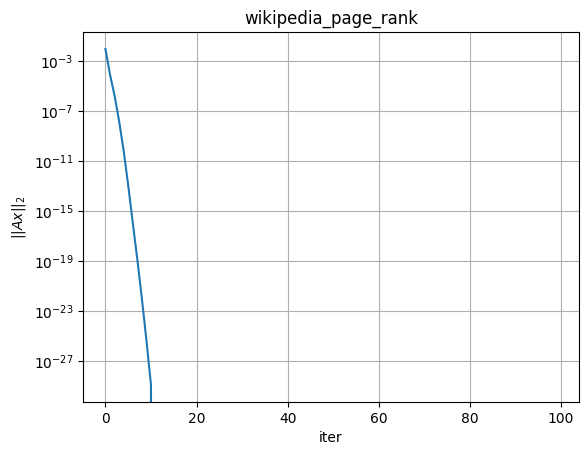

In [27]:
plt.plot(errors_real)
plt.yscale('log')
plt.title("wikipedia_page_rank")
plt.ylabel("$||Ax||_{2}$")
plt.xlabel("iter")
plt.grid()